## Common

### What are the most common fungi in the city (by form group)?

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.eda import COLORS, COLORS_DICT, nymyc_cmap, nymyc_cmap_r, read_all_csvs

mpl.colormaps.register(cmap=nymyc_cmap)
mpl.colormaps.register(cmap=nymyc_cmap_r)
nymyc_palette = sns.set_palette(sns.color_palette(COLORS))

# Show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Auto-reload modules
%load_ext autoreload
%autoreload 2

In [2]:
%%time
dfs = read_all_csvs('./data')
print(dfs.keys())

[*] Reading in Parks.csv...
[*] Reading in BroadGroups.csv...
[*] Reading in Parks_Properties_20241008.csv...
[*] Reading in Mushroom.csv...
[*] Reading in Walks.csv...
[*] Reading in Observations.csv...
dict_keys(['parks', 'broadgroups', 'parks_properties_20241008', 'mushroom', 'walks', 'observations'])
CPU times: user 283 ms, sys: 42.7 ms, total: 326 ms
Wall time: 348 ms


''

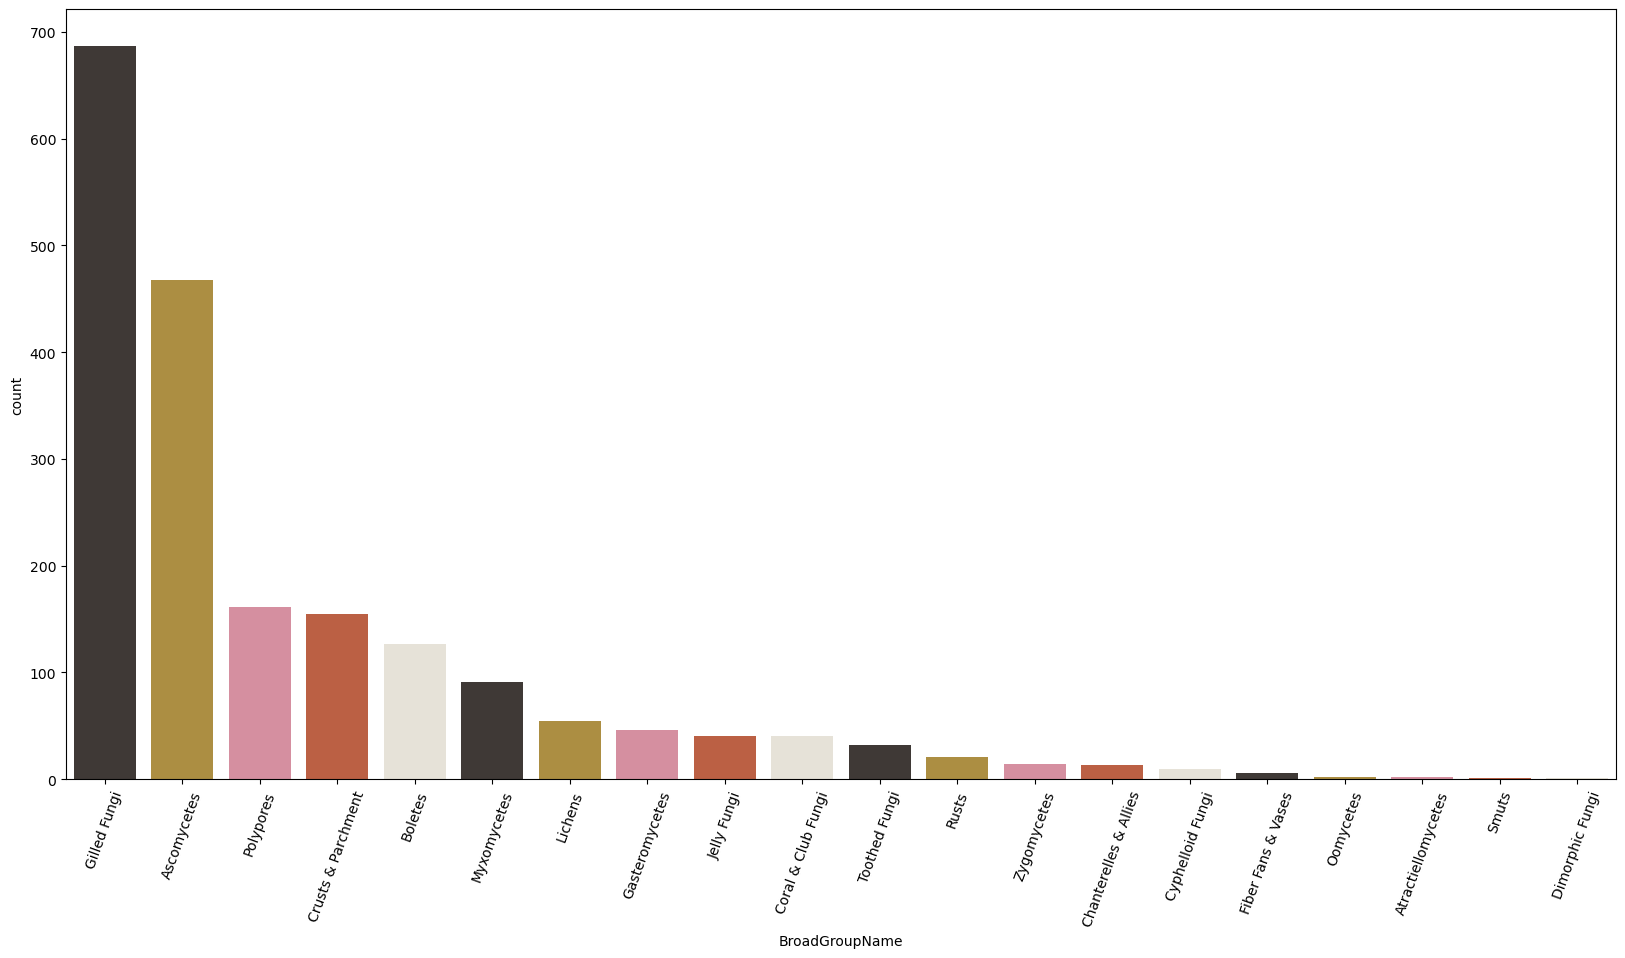

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
group_counts = dfs['mushroom'].merge(dfs['broadgroups'], on='BroadGroupID', how='left')
sns.countplot(data=group_counts, x='BroadGroupName', order=group_counts['BroadGroupName'].value_counts().index, 
              palette=COLORS, ax=ax)
plt.xticks(rotation=70)
;

**Can we break that down by Borough instead?** For this, we'll need:
 - Observations: this will serve as the base table b/c it has the mushroom IDs and the park IDs
 - LEFT JOIN mushrooms on `MushroomID`
 - LEFT JOIN groups on `BroadGroupID`

In [8]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['parks'][['ParkID','ParkName','Borough']].dropna(), on='ParkID', how='left')\
                                  .drop(['Notes','LinkToINat','DateCreated','DateModified'], axis=1)
observations.head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan


''

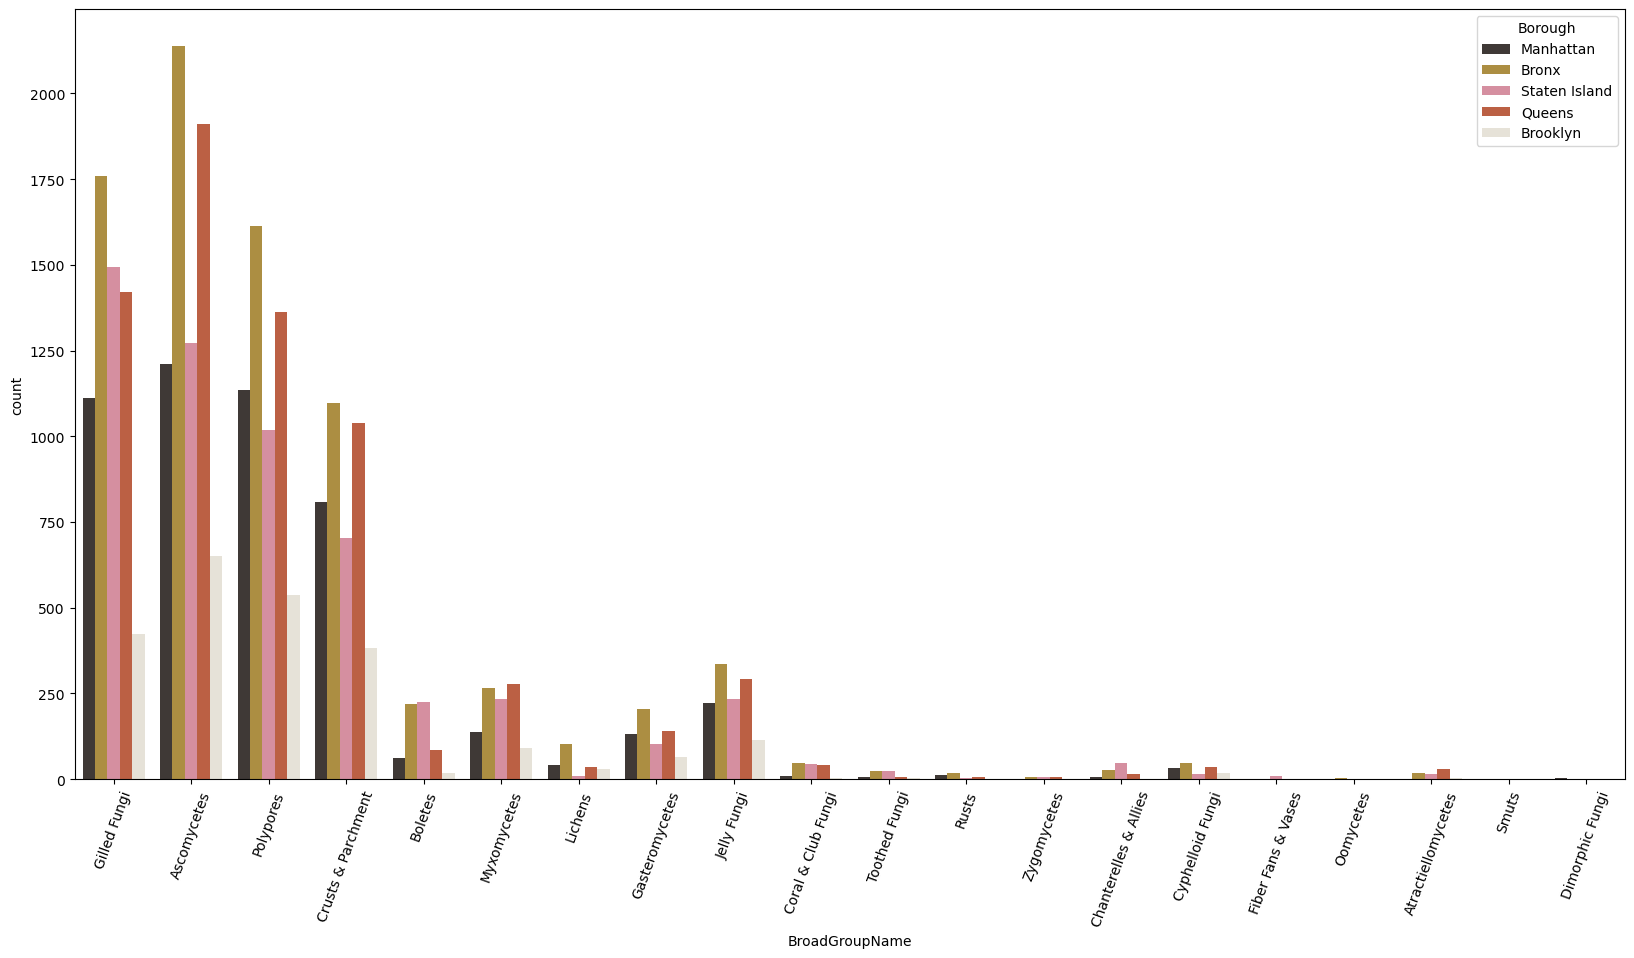

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="BroadGroupName", hue="Borough", 
              order=group_counts['BroadGroupName'].value_counts().index,
              palette=COLORS
             )
plt.xticks(rotation=70)
;

What about by park? For this, perhaps it would be best to simply display the top 3 broad group names per park

In [10]:
observations.groupby(['ParkName','BroadGroupName']).filter(lambda x: len(x) > 5)

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
33295,34770,1198,571,24,NaN,NaN,12.0,Trametes,cinnabarina,Polypores,Inwood Hill Park,Manhattan
33296,34771,193,571,24,NaN,NaN,12.0,Trametes,conchifer,Polypores,Inwood Hill Park,Manhattan
33297,34772,208,571,24,NaN,NaN,12.0,Trametes,gibbosa,Polypores,Inwood Hill Park,Manhattan
33298,34773,194,571,24,NaN,NaN,12.0,Trametes,versicolor,Polypores,Inwood Hill Park,Manhattan


In [11]:
observations.groupby('ParkName')['BroadGroupName'].value_counts()
# ['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              565
                   Gilled Fungi             439
                   Polypores                373
                   Crusts & Parchment       276
                   Myxomycetes               75
                                           ... 
Woodlawn Cemetery  Myxomycetes                9
                   Coral & Club Fungi         7
                   Toothed Fungi              3
                   Chanterelles & Allies      2
                   Cyphelloid Fungi           2
Name: count, Length: 250, dtype: int64

In [12]:
observations.groupby('ParkName')['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              0.294424
                   Gilled Fungi             0.228765
                   Polypores                0.194372
                   Crusts & Parchment       0.143825
                   Myxomycetes              0.039083
                                              ...   
Woodlawn Cemetery  Myxomycetes              0.011139
                   Coral & Club Fungi       0.008663
                   Toothed Fungi            0.003713
                   Chanterelles & Allies    0.002475
                   Cyphelloid Fungi         0.002475
Name: proportion, Length: 250, dtype: float64

''

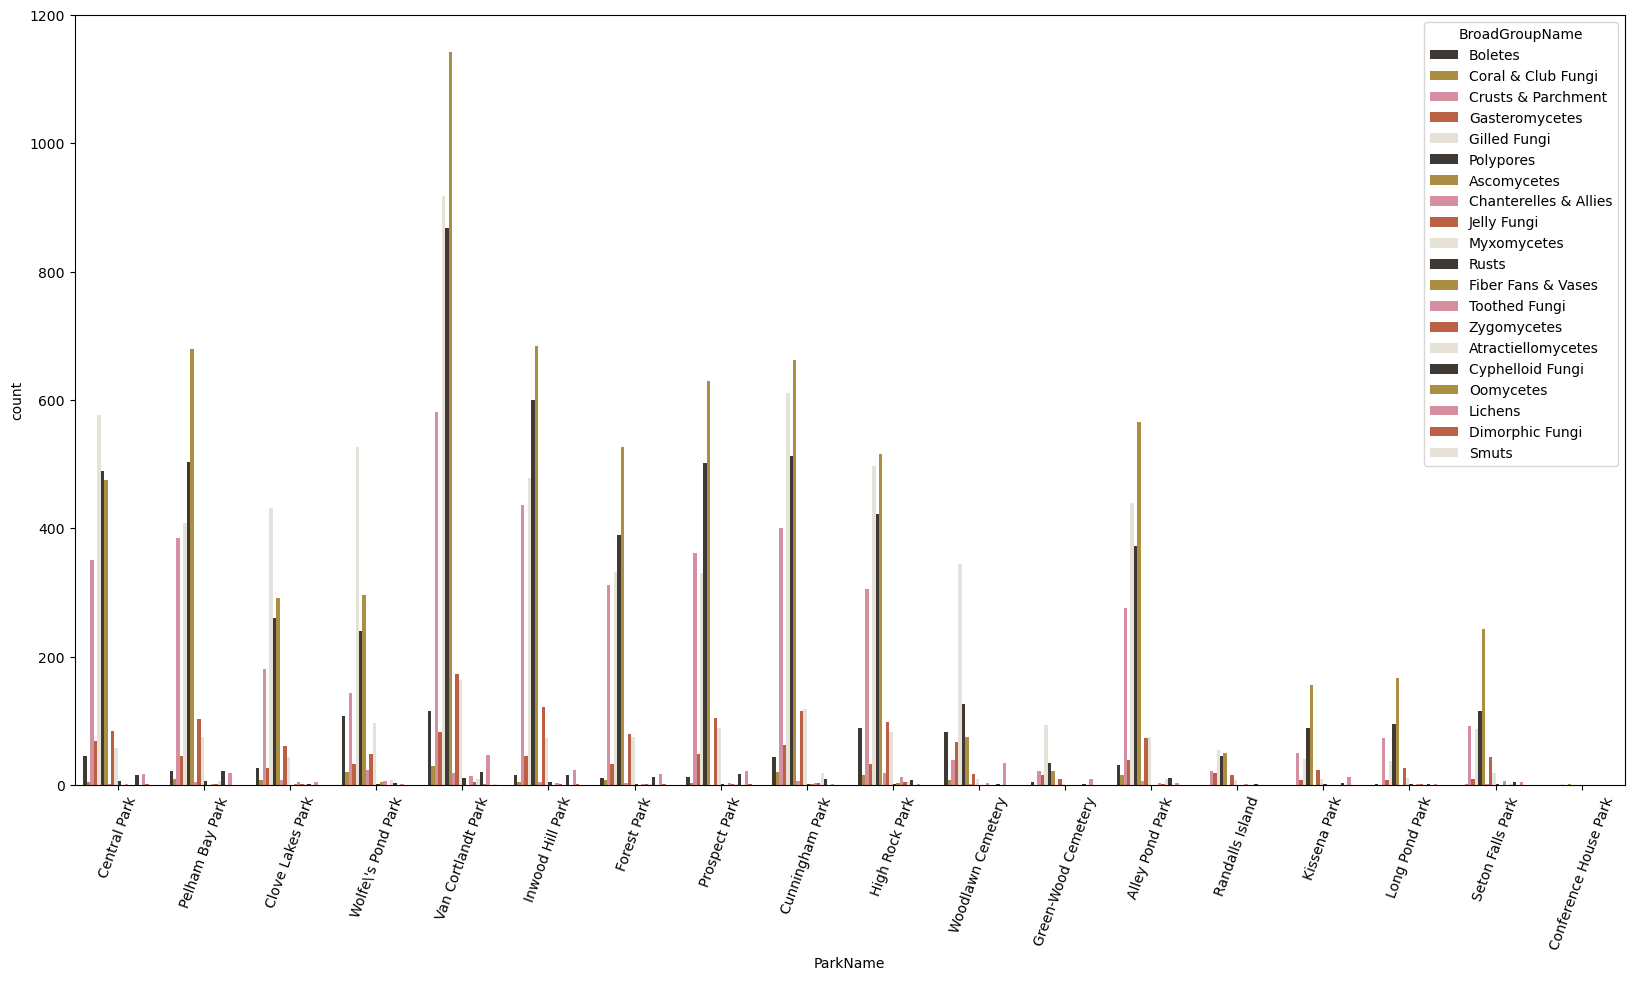

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="ParkName", hue="BroadGroupName", palette=COLORS)
plt.xticks(rotation=70)
;

### What fungi is consistently seen all year long?

Try by `BoradGroupName` in addition to `Genus` and `Species`.

In [14]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateModified'], axis=1)
observations['Date'] = observations['DateCreated'].dt.normalize()
observations['Month'] = observations['DateCreated'].dt.month
observations.head()

,MushroomID,DateCreated,BroadGroupID,Genus,Species,BroadGroupName,Date,Month
0,300,2023-12-11 16:39:21,3.0,Hortiboletus,campestris,Boletes,2023-12-11,12
1,2329,2023-12-13 21:15:44,3.0,Boletus,subvelutipes-complex,Boletes,2023-12-13,12
2,3,2023-12-11 16:39:21,3.0,Cyanoboletus,pulverulentus,Boletes,2023-12-11,12
3,4,2023-12-11 16:39:21,3.0,Gyroporus,castaneus,Boletes,2023-12-11,12
4,5,2023-12-11 16:39:21,3.0,Tylopilus,ferrugineus,Boletes,2023-12-11,12


''

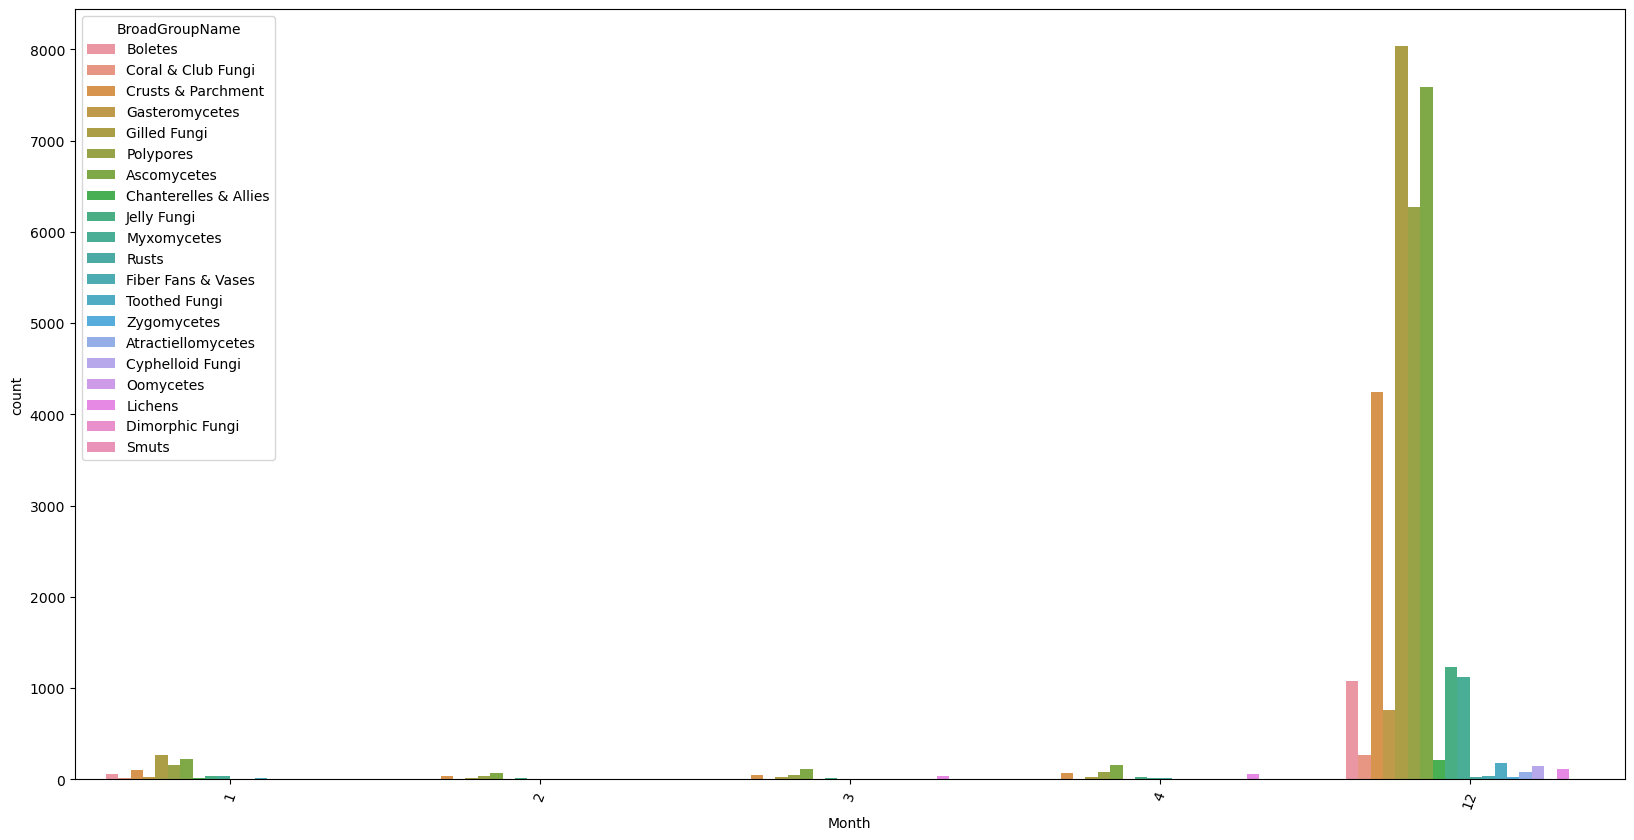

In [15]:
# Sanity check for dates
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x='Month', hue='BroadGroupName')
plt.xticks(rotation=70)
;

Something is going on with the data here--why are there so many more observations from last December, and specifically December 10?

*Solved:* It turns out that the `Observations` table dates only go back to December 2023, perhaps when the table itself was populated, but they do link to observations from `Walks` dating back to 2009. Don't use the date columns from the `Observations` table to timestamp specific mushroom observations. Instead, join in `Walks` and use the `WalkDate`.

In [16]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June


In [17]:
observations['Date'].describe()

count                            33136
mean     2018-11-16 11:30:50.410429440
min                2009-06-28 00:00:00
25%                2016-05-08 00:00:00
50%                2018-11-17 00:00:00
75%                2022-04-02 00:00:00
max                2024-04-13 00:00:00
Name: Date, dtype: object

In [18]:
observations['Month'].value_counts()

Month
July     4223
Aug      3659
Oct      3524
Nov      3185
June     2892
Sep      2831
Jan      2537
Dec      2336
March    2266
May      1945
Feb      1914
April    1824
Name: count, dtype: int64

That's much better. Now we can actually attempt to answer the question.

In [19]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
df = observations.groupby(['Month']).BroadGroupName.value_counts().groupby(level=0, group_keys=False).head(5)
df

Month  BroadGroupName    
April  Ascomycetes            650
       Polypores              443
       Crusts & Parchment     304
       Gilled Fungi           173
       Jelly Fungi            102
Aug    Gilled Fungi          1299
       Ascomycetes            592
       Polypores              517
       Boletes                406
       Crusts & Parchment     265
Dec    Ascomycetes            689
       Polypores              509
       Crusts & Parchment     450
       Gilled Fungi           394
       Jelly Fungi            132
Feb    Ascomycetes            695
       Polypores              452
       Crusts & Parchment     344
       Gilled Fungi           171
       Jelly Fungi            114
Jan    Ascomycetes            838
       Polypores              589
       Crusts & Parchment     473
       Gilled Fungi           304
       Jelly Fungi            159
July   Gilled Fungi          1461
       Ascomycetes            723
       Polypores              668
       Boletes        

''

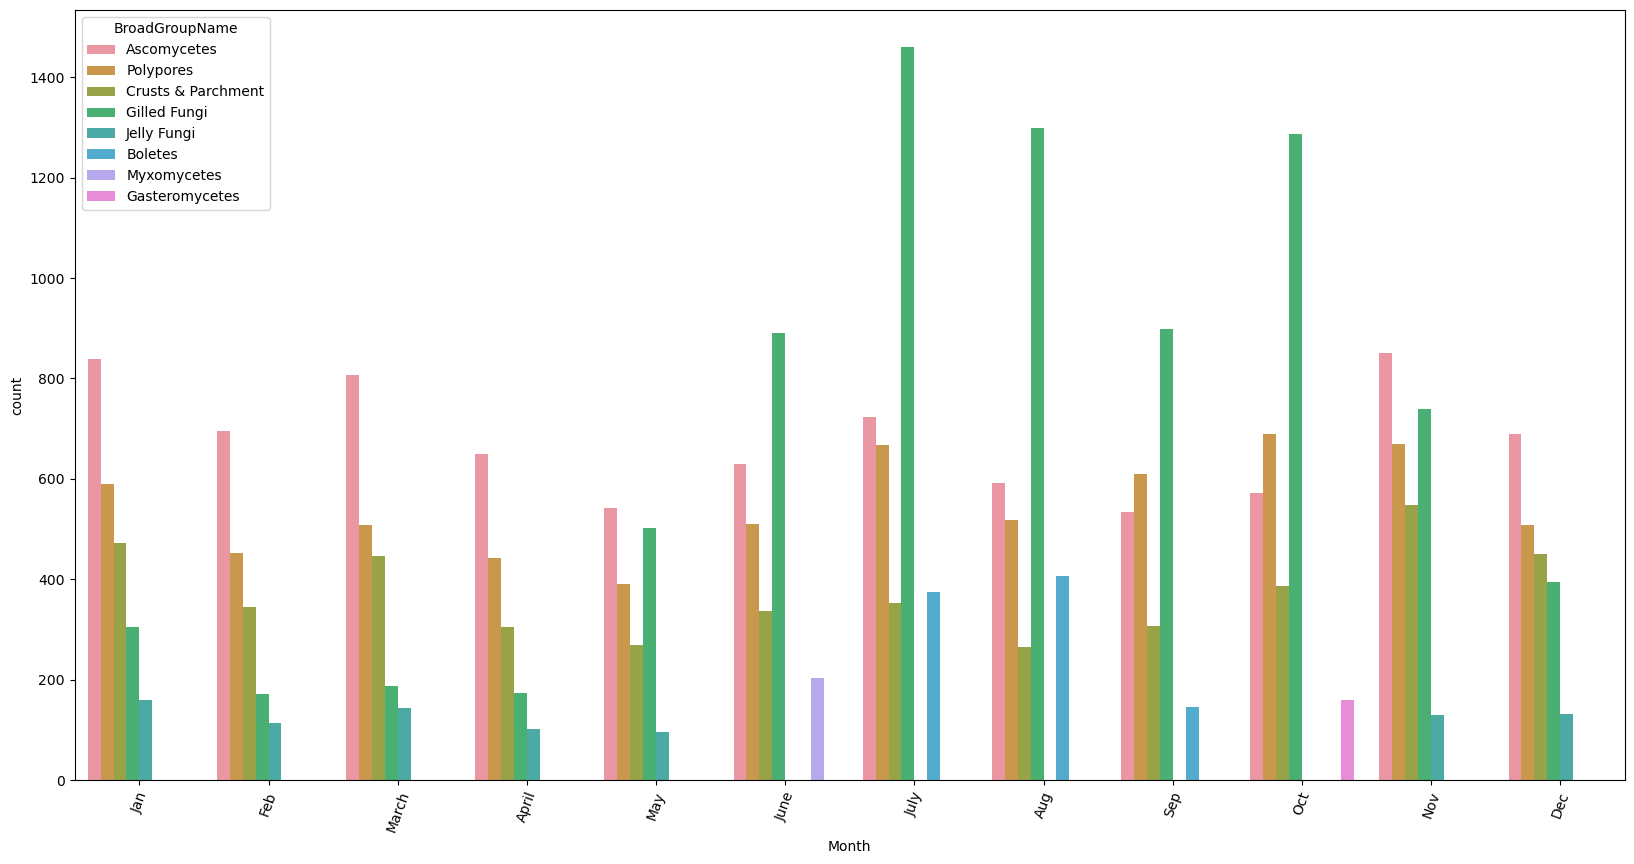

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.barplot(df, x='Month', y='count', hue='BroadGroupName', 
            order=months.values())
plt.xticks(rotation=70)
;

Unsurprisingly, **Gilled Fungi** are the most commonly found late spring through fall. However, **Ascomycetes** and **Polypores** are, perhaps also unsurprisingly, the most commonly found overall all year long.

''

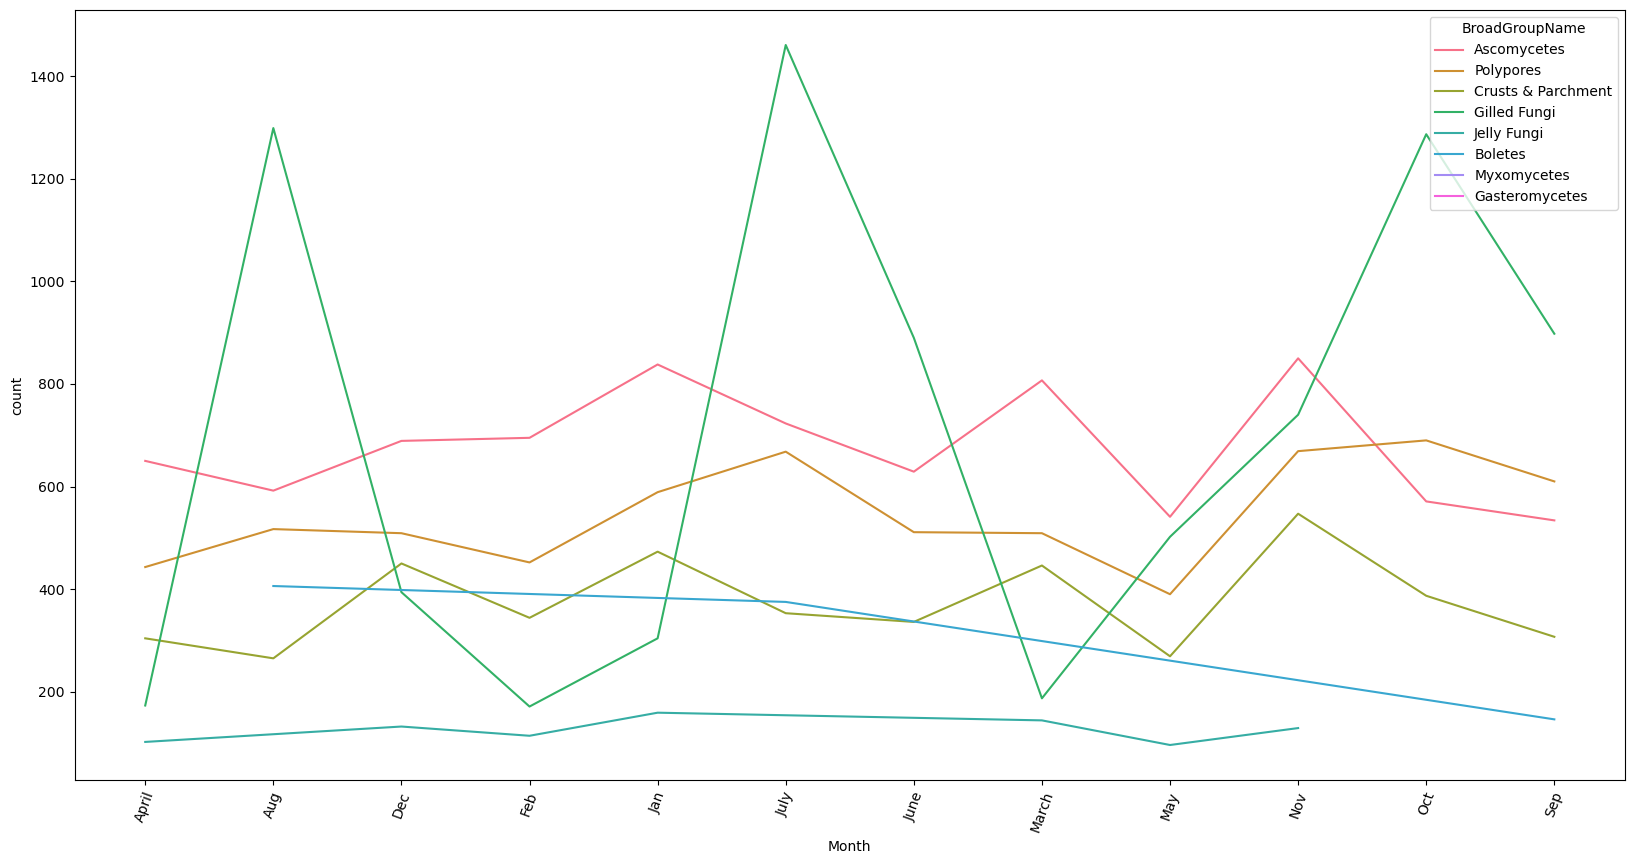

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.lineplot(df, x='Month', y='count', hue='BroadGroupName') #, order=months.values())
plt.xticks(rotation=70)
;

Need to fix month order. Perhaps translate months back into numbers (1-12) and then use a string formatter/mapping function in the actual drawing of the axis.

### Is anything on a decline / are there any species becoming observed less frequently?

Let's look at species change over time similar to the lineplot above, but instead of grouped by month we'll just look at all time.

In [22]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations['Week'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[1], axis=1)
observations['Year'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[0], axis=1)
observations['Month_Year'] = observations.apply(lambda x: f"{x['Month']}, {x['Year']}", axis=1)
observations['Week_Year'] = observations.apply(lambda x: f"Week {x['Week']}, {x['Year']}", axis=1)
observations['Quarter'] = observations['WalkDate'].dt.quarter
observations['Quarter_Year'] = observations.apply(lambda x: f"Q{x['Quarter']}, {x['Year']}", axis=1)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month,Week,Year,Month_Year,Week_Year,Quarter,Quarter_Year
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"


In [23]:
df = pd.DataFrame(
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .rolling(7).mean()
)
# df['rolling_week_mean'] = df.rolling(7).mean()
df

count
WalkDate   BroadGroupName               
2009-06-28 Gilled Fungi              NaN
           Boletes                   NaN
           Polypores                 NaN
           Gasteromycetes            NaN
           Crusts & Parchment        NaN
...                                  ...
2024-04-13 Rusts               12.714286
           Cyphelloid Fungi     8.428571
           Dimorphic Fungi      5.857143
           Gasteromycetes       4.142857
           Myxomycetes          2.428571

[3750 rows x 1 columns]

In [24]:
df = (
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
)
# df.count.rolling(7).mean() 
df = df.set_index('WalkDate')
df.rolling(7)

AttributeError: 'Series' object has no attribute 'set_index'

In [ ]:
df['moving'] = df.groupby(['col_1', 'col_2', 'col_3']).rolling(10)['value'].mean().droplevel(level=[0,1,2])


In [25]:
pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby('WalkDate')
    .BroadGroupName.value_counts()
    .rolling('7D').mean()
)

NameError: name 'top_ten_groups' is not defined

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
top_ten_groups = list(observations['BroadGroupName'].value_counts().head(10).index)
df = pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby(['WalkDate', 'BroadGroupName'])
    .rolling('90D')[]
    .BroadGroupName.value_counts()
    .reset_index()
)
df.index = pd.DatetimeIndex(df['WalkDate'])
df = df.sort_index().drop('WalkDate', axis=1).rolling('90D').mean()
display(df)
sns.lineplot(df, x='WalkDate', y='count', hue='BroadGroupName')
plt.xticks(rotation=30)
;

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1593421294.py, line 4)

''

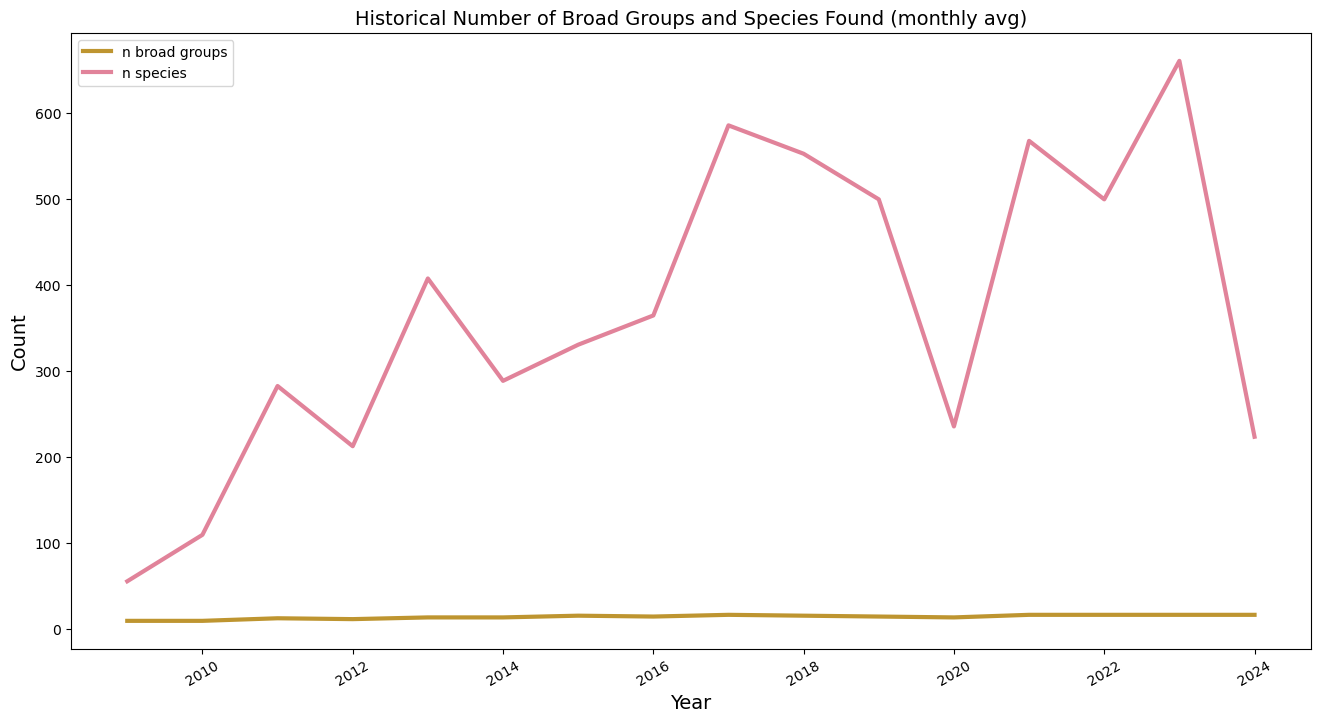

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
rolling = 7
groupby = 'Year'
df_count_of_groups = (
    observations
    .groupby(groupby)
    .BroadGroupName.nunique()
    # .rolling(rolling).mean()
)
df_count_of_species = (
    observations
    .groupby(groupby)
    .Species.nunique()
    # .rolling(rolling).mean()
)
sns.lineplot(df_count_of_groups, color=COLORS[1], label='n broad groups', 
             linewidth=3, ax=ax)
sns.lineplot(df_count_of_species, color=COLORS[2], label='n species',
             linewidth=3, ax=ax)
plt.xlabel(groupby, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Historical Number of Broad Groups and Species Found (monthly avg)", fontsize=14)
plt.legend()
plt.xticks(rotation=30)
;

## Change Over Time: Looking at Specific Species

Ethan had some suggestions of which ones to look at:
```
1) Just a hunch: Lycoperdon perlatum

2) Species that appear to be extending their range:
Trametes sanguinea (perhaps it is outcompeting Trametes cinnabarina)
Trametes gibbosa
Trametes lactinea
Radulomyces copelandii
Chlorophyllum molybdites

3) Edible species that everyone looks for:
Laetiporus sulphureus
Laetiporus cincinnatus
Pleurotus ostreatus
Grifola frondosa
Morchella angusticeps
Cantharellus cinnabarinus
Cantharellus lateritius 
Cantharellus... any other species except C. minor (this is complicated since we don't know what to call our Chanterelle species complex. We usually have it in our lists as C. cibarius-complex)
Calvatia gigantea

What just occurred to me about this list, though, is that there is only one gilled mushroom on it. Do we think that is a deficiency?```

In [31]:
# Organizing Ethan's list as a dictionary: {'<Genus>': '<species>'}
check_species = {'Lycoperdon': 'perlatum',
                 'Trametes': 'sanguinea', 
                 'Trametes': 'cinnabarina', 
                 'Trametes': 'gibbosa',
                 'Trametes': 'lactinea',
                 'Radulomyces': 'copelandii',
                 'Chlorophyllum': 'molybdites',
                 'Laetiporus': 'sulphureus',
                 'Laetiporus': 'cincinnatus',
                 'Pleurotus': 'ostreatus',
                 'Grifola': 'frondosa',
                 'Morchella': 'angusticeps',
                 'Cantharellus': 'cinnabarinus',
                 'Cantharellus': 'lateritius',
                 'Calvatia': 'gigantea'}

In [36]:
subset = observations.loc[(observations['Genus'].isin(check_species.keys())) & (observations['Species'].isin(check_species.values()))]
subset.shape

(776, 14)

In [43]:
subset.loc[(subset['Genus'] == 'Pleurotus') & (subset['Species'] == 'ostreatus')].groupby('Year').count()['MushroomID']

Year
2010     3
2011     8
2012     9
2013    24
2014    22
2015    22
2016    23
2017    29
2018    25
2019    18
2020     6
2021     7
2022    18
2023    13
2024     5
Name: MushroomID, dtype: int64

''

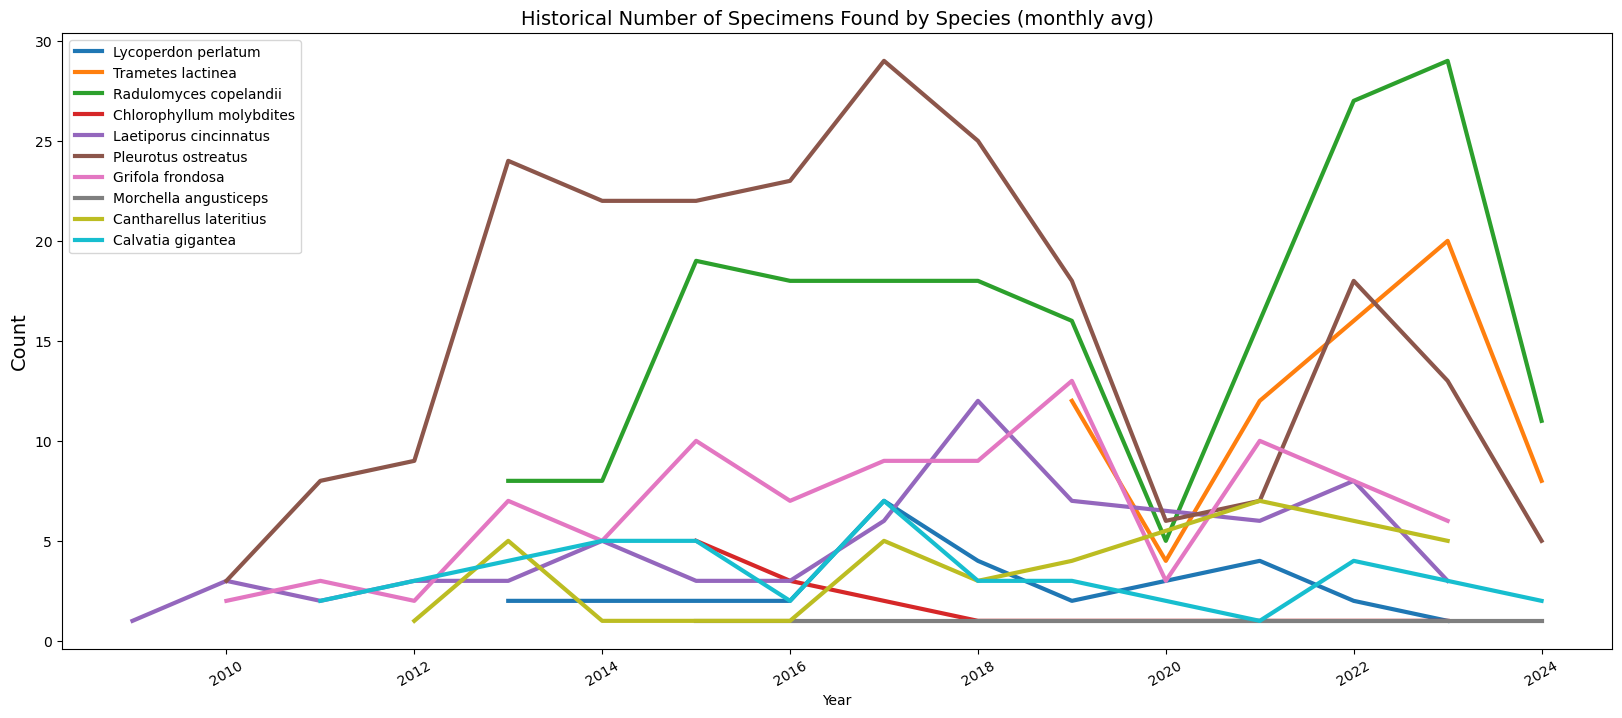

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
rolling = 7
groupby = 'Year'
for Genus, species in check_species.items():
    temp = (subset.loc[(subset['Genus'] == Genus) & (subset['Species'] == species)]
           .groupby(groupby)
           .count()['MushroomID'])
    sns.lineplot(temp, label=f'{Genus} {species}', 
                 linewidth=3, ax=ax, palette="tab10")
plt.ylabel("Count", fontsize=14)
plt.title("Historical Number of Specimens Found by Species (monthly avg)", fontsize=14)
plt.legend()
plt.xticks(rotation=30)
;